In [1]:
%load_ext supriya.ext.ipython
import supriya

## Realtime Server Node Tree Model

In [2]:
synth_a = supriya.Synth(frequency=333)
synth_b = supriya.Synth(frequency=444)
synth_c = supriya.Synth(frequency=555)
outer_group = supriya.Group()
inner_group = supriya.Group()
outer_group.extend([synth_a, inner_group, synth_c])
inner_group.append(synth_b)

In [3]:
# groups know about their children
for index, node in enumerate(outer_group.children):
    print(index, repr(node)) 

0 <- Synth: ???>
1 <- Group: ???>
2 <- Synth: ???>


In [4]:
# and nodes know about their parents
for distance, node in enumerate(synth_b.parentage):
    print(distance, repr(node))

0 <- Synth: ???>
1 <- Group: ???>
2 <- Group: ???>


In [5]:
# nodes can be iterated depthfirst and know their position in the tree
for child in outer_group.depth_first():
    print(repr(child), child.graph_order)

<- Synth: ???> (0,)
<- Group: ???> (1,)
<- Synth: ???> (1, 0)
<- Synth: ???> (2,)


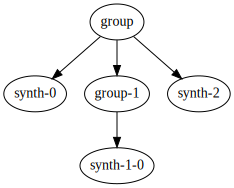

PosixPath('/Users/ixm250/Library/Caches/supriya/20190117T200136-775f06c.svg')

In [6]:
_ = supriya.graph(outer_group)

In [9]:
# booting is just like in sclang
server = supriya.Server()
server.boot()

<Server: udp://127.0.0.1:57751, 8i8o>

In [10]:
# printing asks for the string representation of an object
# string representation are/can be different from interpreter representations
# we can query the node tree via /g_queryTree requests
print(server)

NODE TREE 0 group
    1 group


In [14]:
# allocating a group also recursively allocates its children
outer_group.allocate()
print(server)

NODE TREE 0 group
    1 group
        1000 group
            1001 default
                out: 0.0, amplitude: 0.1, frequency: 333.0, gate: 1.0, pan: 0.5
            1002 group
                1003 default
                    out: 0.0, amplitude: 0.1, frequency: 444.0, gate: 1.0, pan: 0.5
            1004 default
                out: 0.0, amplitude: 0.1, frequency: 555.0, gate: 1.0, pan: 0.5


TODO: Are SynthDef's marked as allocated client-side when allocated during node allocation?

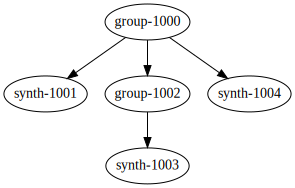

PosixPath('/Users/ixm250/Library/Caches/supriya/20190117T200305-51db82f.svg')

In [15]:
_ = supriya.graph(outer_group)

In [16]:
synth_d = supriya.Synth(synthdef=supriya.assets.synthdefs.pad)

In [17]:
# synthdefs are also automatically allocated
synth_d = supriya.Synth(synthdef=supriya.assets.synthdefs.pad)
inner_group.extend([synth_d, synth_a])

In [18]:
for node in outer_group.children:
    print(repr(node))

<+ Group: 1002>
<+ Synth: 1004>


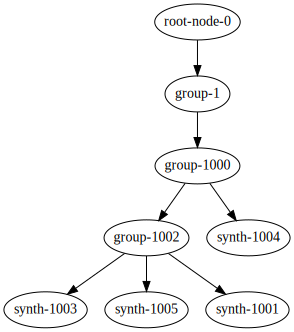

PosixPath('/Users/ixm250/Library/Caches/supriya/20190117T200527-816f9bf.svg')

In [20]:
_ = supriya.graph(server)

In [21]:
outer_group.free()

<- Group: ???>

In [22]:
print(server)

NODE TREE 0 group
    1 group


In [23]:
print(outer_group)

??? group
    ??? group
        ??? default
            amplitude: 0.1, frequency: 444.0, gate: 1.0, out: 0.0, pan: 0.5
        ??? pad
            amplitude: 0.1, filter_frequency: 1500.0, frequency: 440.0, gate: 1.0, out: 0.0, pan: 0.0
        ??? default
            amplitude: 0.1, frequency: 333.0, gate: 1.0, out: 0.0, pan: 0.5
    ??? default
        amplitude: 0.1, frequency: 555.0, gate: 1.0, out: 0.0, pan: 0.5


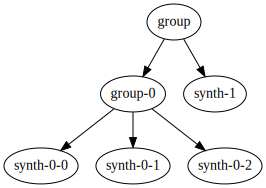

PosixPath('/Users/ixm250/Library/Caches/supriya/20190117T200603-25e4553.svg')

In [24]:
supriya.graph(outer_group)

In [25]:
server.quit()

<Server: offline>

## OSC Command Aggregation

## Requests and Responses

## SynthDef Builders

SynthDefs are built via context managers, not via the namespaces of functions

SynthDefs do not need to be named; Supriya uses hashing to generate unique names

## Graphviz Everything

## SynthDef Factories

## Non-realtime Session Model

## Non-realtime Session "Renderables"

## NRT Dependency Tree (turtles all the way down)

## (N)RT Patterns

## CLI Tooling and NRT Projects